# Transform images with PIL operations

Apply PIL transformations to multiple images—resize, rotate, flip, convert to grayscale, crop.

**What's in this recipe:**
- Basic image operations (resize, rotate, flip, grayscale, crop)
- Chain multiple transformations
- Track image properties


## Problem

You need to resize, rotate, crop, or convert hundreds of images—and keep track of all the transformed versions.


## Solution

**Without Pixeltable:** Loop through images, apply transformations with Pillow (or OpenCV, scikit-image), track results manually.

**With Pixeltable:** Use Pillow methods in computed columns. All images transformed automatically with full history.


In [ ]:
%pip install -qU pixeltable

In [1]:
import pixeltable as pxt

### Load images


In [5]:
# Create a fresh directory (drop existing if present)
pxt.drop_dir('image_demo', force=True)
pxt.create_dir('image_demo')

Created directory 'image_demo'.


In [6]:
t = pxt.create_table('image_demo.images', {'image': pxt.Image})
t.insert([
    {'image': 'https://raw.githubusercontent.com/pixeltable/pixeltable/main/docs/resources/images/000000000001.jpg'},
    {'image': 'https://raw.githubusercontent.com/pixeltable/pixeltable/main/docs/resources/images/000000000016.jpg'},
])

Created table 'images'.
Inserting rows into `images`: 2 rows [00:00, 480.89 rows/s]
Inserted 2 rows with 0 errors.


2 rows inserted, 4 values computed.

### Basic image properties


In [7]:
t.add_computed_column(height=t.image.height)
t.add_computed_column(width=t.image.width)
t.add_computed_column(mode=t.image.mode)  # RGB, RGBA, L (grayscale), etc.

t.select(t.height, t.width, t.mode).show()

Added 2 column values with 0 errors.
Added 2 column values with 0 errors.
Added 2 column values with 0 errors.


height,width,mode
480,640,RGB
640,480,RGB


### Resize images


Added 2 column values with 0 errors.


resized,height,width
,224,224
,224,224

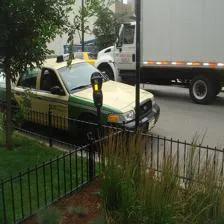
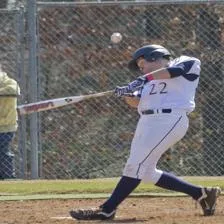

In [8]:
# Resize to 224x224 (common ML model input size)
t.add_computed_column(resized=t.image.resize((224, 224)))

t.select(t.resized, t.resized.height, t.resized.width).show()

### Convert to grayscale


Added 2 column values with 0 errors.


grayscale,mode
,L
,L

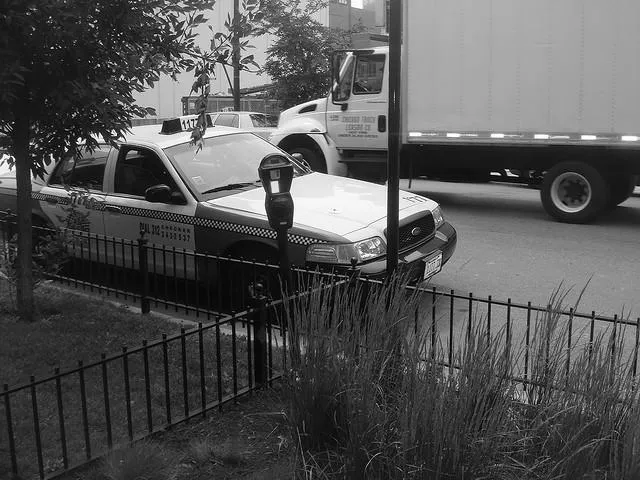
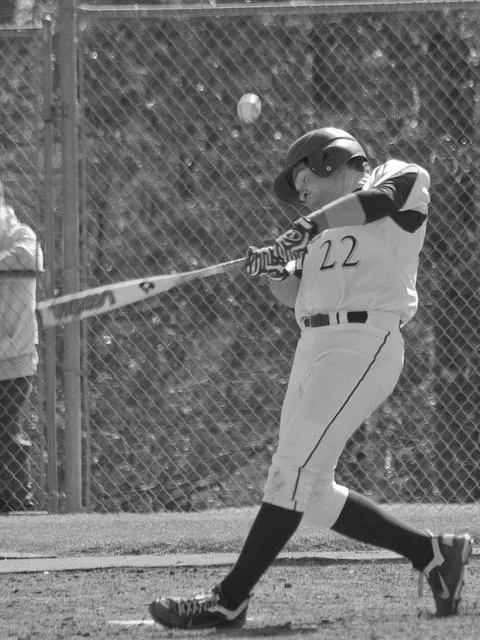

In [9]:
t.add_computed_column(grayscale=t.image.convert('L'))

t.select(t.grayscale, t.grayscale.mode).show()


### Rotate images


Added 2 column values with 0 errors.


rotated
""
""

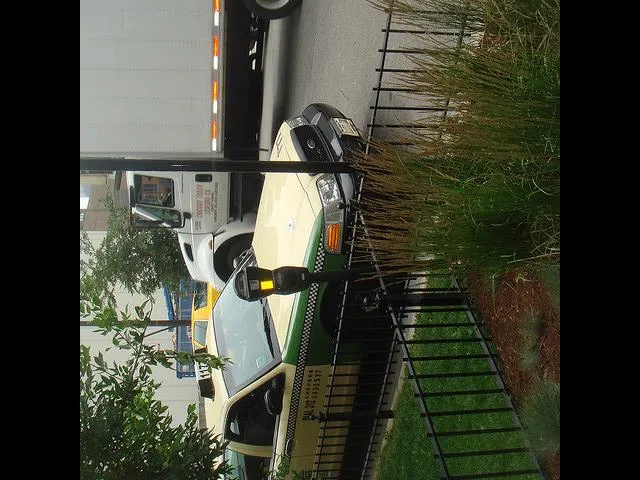
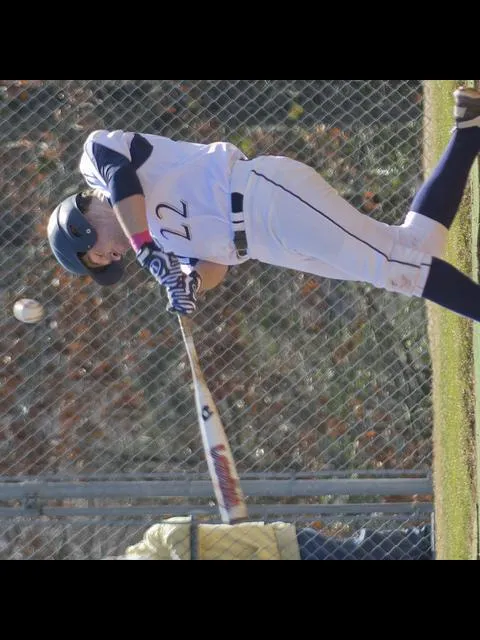

In [10]:
t.add_computed_column(rotated=t.image.rotate(90))

t.select(t.rotated).show()

### Flip and mirror images


Added 2 column values with 0 errors.
Added 2 column values with 0 errors.


image,flipped_vertical,flipped_horizontal
,,
,,

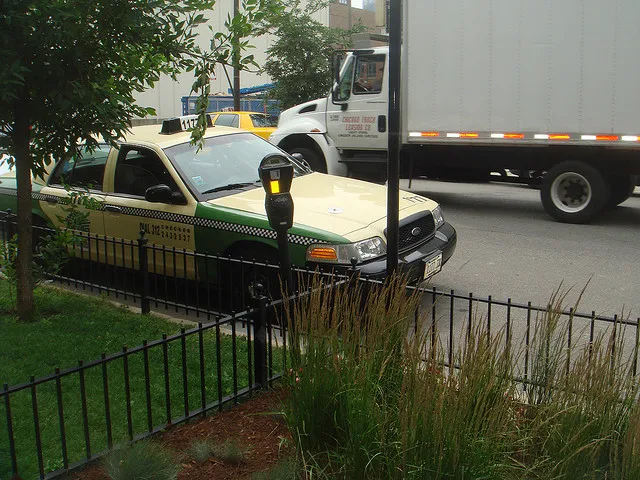
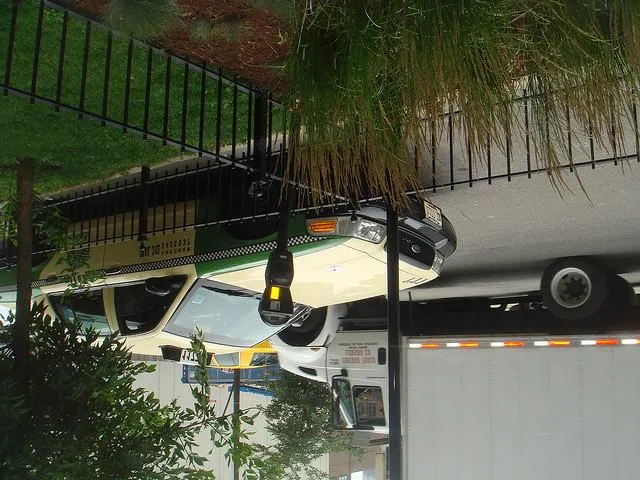
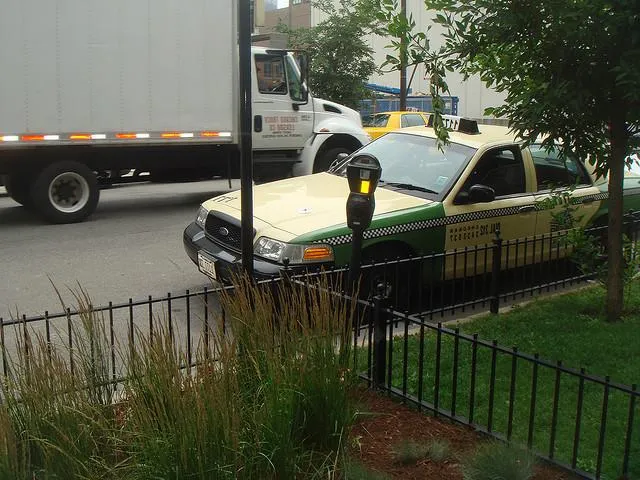
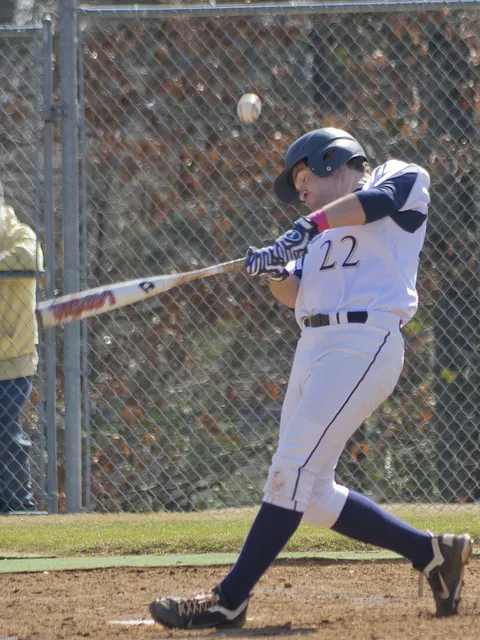
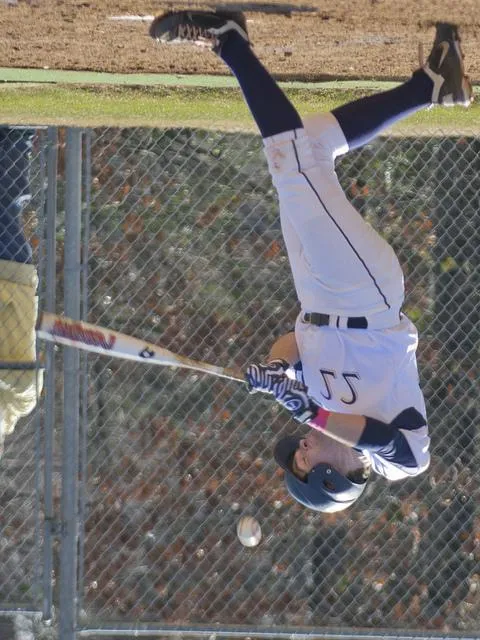
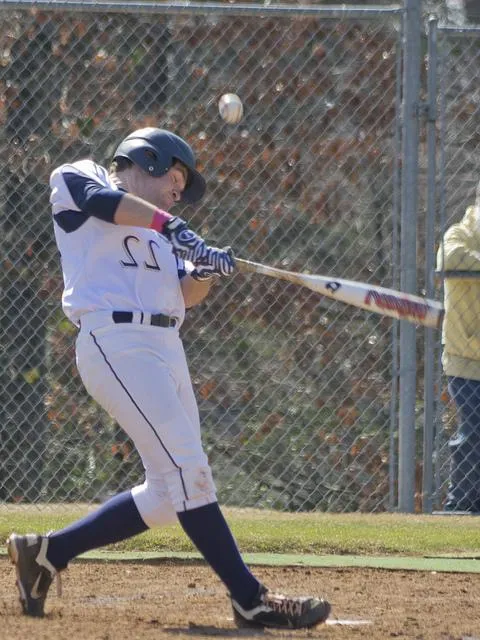

In [11]:
from PIL import Image

# Flip vertically (top to bottom)
t.add_computed_column(flipped_vertical=t.image.transpose(Image.FLIP_TOP_BOTTOM))

# Flip horizontally (left to right, mirror effect)
t.add_computed_column(flipped_horizontal=t.image.transpose(Image.FLIP_LEFT_RIGHT))

t.select(t.image, t.flipped_vertical, t.flipped_horizontal).show()


### Chain multiple transformations


Added 2 column values with 0 errors.


processed
""
""

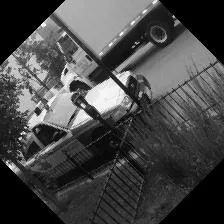
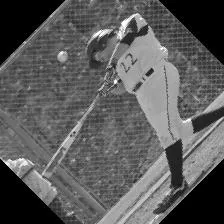

In [12]:
# Resize, convert to grayscale, and rotate in one expression
t.add_computed_column(
    processed=t.image.resize((224, 224)).convert('L').rotate(45)
)

t.select(t.processed).show()

### Crop images


Added 2 column values with 0 errors.


center_crop
""
""

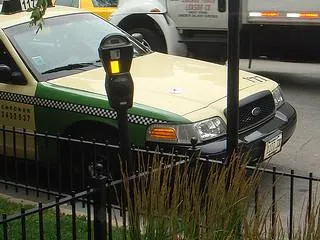
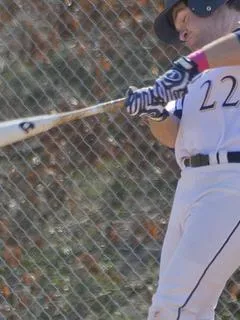

In [13]:
# Crop to center square
# Box format: (left, top, right, bottom)
t.add_computed_column(
    center_crop=t.image.crop((
        t.image.width // 4,
        t.image.height // 4,
        3 * t.image.width // 4,
        3 * t.image.height // 4
    ))
)

t.select(t.center_crop).show()

## Explanation

**PIL methods work in computed columns:** Pixeltable supports most PIL.Image methods. See [available methods](https://pixeltable.readme.io/docs/working-with-images).

**Chaining:** Combine operations: `t.image.resize((224, 224)).convert('L').rotate(90)`

**Common transformations:**
- `.resize((width, height))` - Resize image
- `.convert('L')` - Convert to grayscale
- `.convert('RGBA')` - Add alpha channel (transparency support)
- `.rotate(degrees)` - Rotate counterclockwise
- `.transpose(Image.FLIP_LEFT_RIGHT)` - Mirror horizontally
- `.transpose(Image.FLIP_TOP_BOTTOM)` - Flip vertically
- `.crop((left, top, right, bottom))` - Extract region

*Based on techniques from the [Real Python Pillow tutorial](https://realpython.com/image-processing-with-the-python-pillow-library/)*


## See also

- [Convert RGB images to grayscale](./rgb-to-grayscale.ipynb)
- [Apply filters to images](./image-filters.ipynb)
